# Анализ разведывательных данных

In [12]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
! mamba install scipy=1.7.1-y
! mamba install seaborn=0.9.0-y

/bin/bash: mamba: command not found
/bin/bash: mamba: command not found


In [25]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [51]:
import pandas as pd
import numpy as np
# import piplite
# await piplite.install('seaborn')

In [84]:
df = pd.read_csv('usedcars.csv', header=0)

In [86]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Анализ индивидуальных особенностей с использованием визуализации

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Найдите корреляцию между следующими столбцами: диаметр цилиндра, ход поршня, степень сжатия и мощность в лошадиных силах.

In [92]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53402.42625174388)

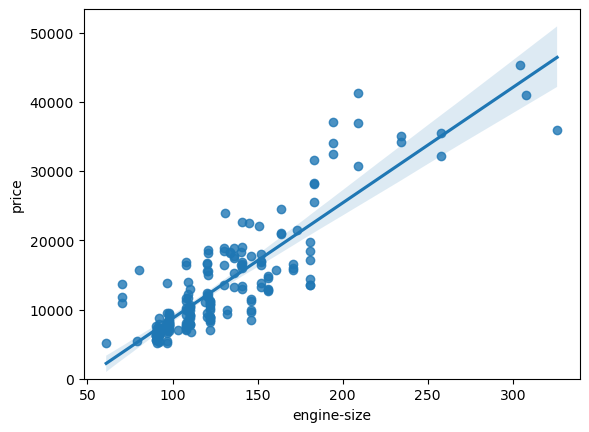

In [94]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

#### Мы можем рассмотреть корреляцию между «объемом двигателя» и «ценой» и увидеть, что она составляет приблизительно 0,87.

In [98]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### Highway mpg — потенциальная переменная-предиктор цены. Давайте найдем диаграмму рассеивания "highway-mpg" и "price".

<Axes: xlabel='highway-mpg', ylabel='price'>

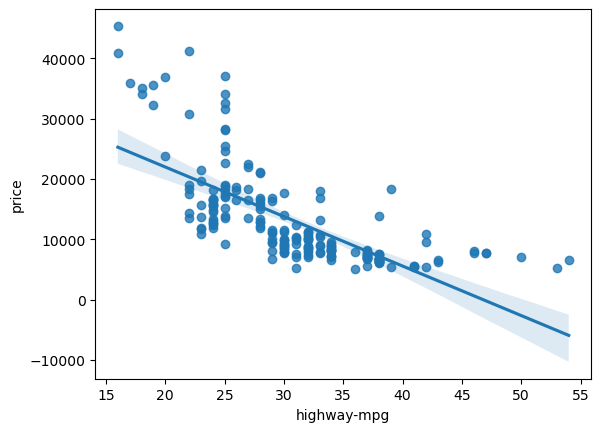

In [101]:
sns.regplot(x="highway-mpg", y="price", data=df)

#### Мы можем изучить корреляцию между «расход топлива на шоссе» и «цена» и увидеть, что она составляет приблизительно -0,704.

In [104]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## Слабая линейная связь

#### Давайте посмотрим, является ли «пиковая скорость вращения» предикторной переменной «цены».

<Axes: xlabel='peak-rpm', ylabel='price'>

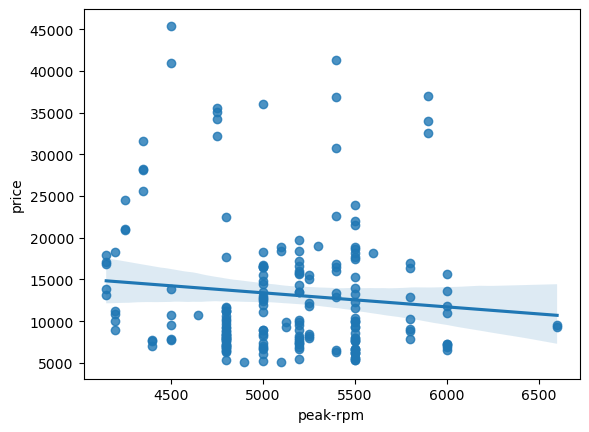

In [109]:
sns.regplot(x="peak-rpm", y="price", data=df)

#### Мы можем изучить корреляцию между «пиковой частотой вращения» и «ценой» и увидеть, что она составляет приблизительно -0,101616.

In [112]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## Категориальные переменные

#### Давайте рассмотрим взаимосвязь между «типом кузова» и «ценой».

<Axes: xlabel='body-style', ylabel='price'>

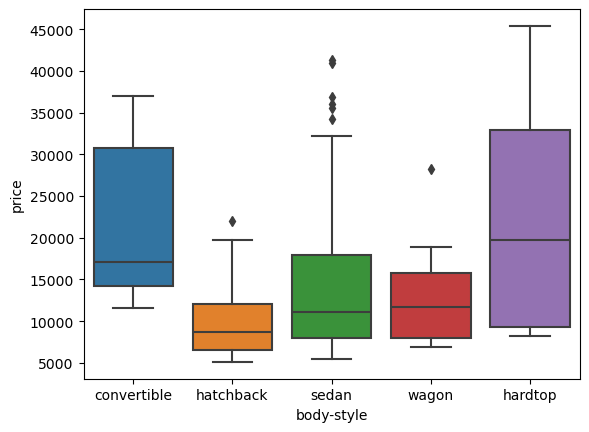

In [116]:
sns.boxplot(x="body-style", y="price", data=df)

#### Мы видим, что распределение цены между различными категориями стиля кузова имеет значительное перекрытие, поэтому стиль кузова не будет хорошим предсказателем цены. Давайте рассмотрим двигатель "расположение двигателя" и "цена":

<Axes: xlabel='engine-location', ylabel='price'>

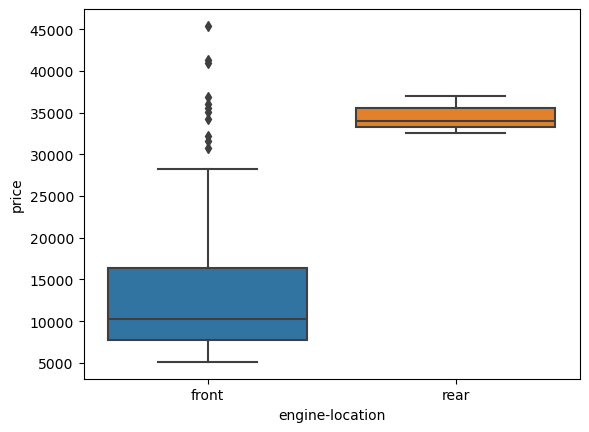

In [119]:
sns.boxplot(x="engine-location", y="price", data=df)

#### Давайте рассмотрим «приводные колеса» и «цену».

<Axes: xlabel='drive-wheels', ylabel='price'>

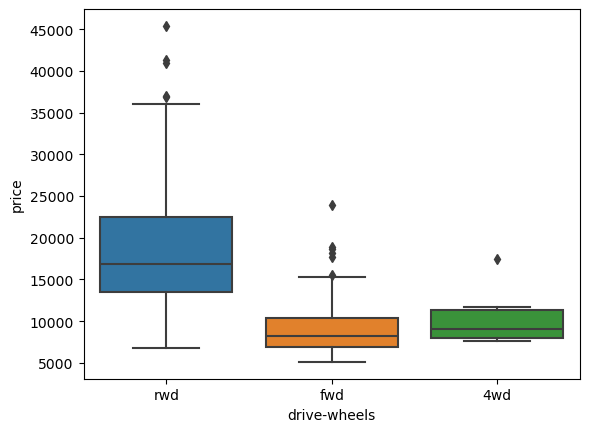

In [122]:
sns.boxplot(x="drive-wheels", y="price", data=df)

## Описательный статистический анализ

In [125]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


#### Значение по умолчанию "describe" пропускает переменные типа object. Мы можем применить метод "describe" к переменным типа 'object' следующим образом:

In [128]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


## Значение имеет значение

In [131]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

#### Мы можем преобразовать ряд в фрейм данных следующим образом:

In [134]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


#### Давайте повторим описанные выше шаги, но сохраним результаты в фрейме данных «drive_wheels_counts» и переименуем столбец «drive-wheels» в «value_counts».

In [137]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


#### Теперь давайте переименуем индекс в «drive-wheels»:

In [140]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


#### Мы можем повторить описанный выше процесс для переменной «engine-location».

In [143]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


## Основы группировки

#### Например, сгруппируем по переменной «приводные колеса». Видим, что есть 3 различные категории приводных колес.

In [147]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

#### Мы можем выбрать столбцы «приводные колеса», «тип кузова» и «цена», а затем присвоить их переменной «df_group_one».

In [151]:
df_group_one = df[['drive-wheels','body-style','price']]

#### Затем мы можем рассчитать среднюю цену для каждой из различных категорий данных.

In [154]:
# grouping results
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


#### Вы также можете группировать по нескольким переменным. Например, давайте сгруппируем по 'drive-wheels' и 'body-style'. Это сгруппирует фрейм данных по уникальной комбинации 'drive-wheels' и 'body-style'. Мы можем сохранить результаты в переменной 'grouped_test1'.

In [157]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


#### В этом случае мы оставим переменную drive-wheels в виде строк таблицы, а pivot body-style сделаем столбцами таблицы:

In [160]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [162]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

#### Переменные: ведущие колеса и тип кузова по сравнению с ценой

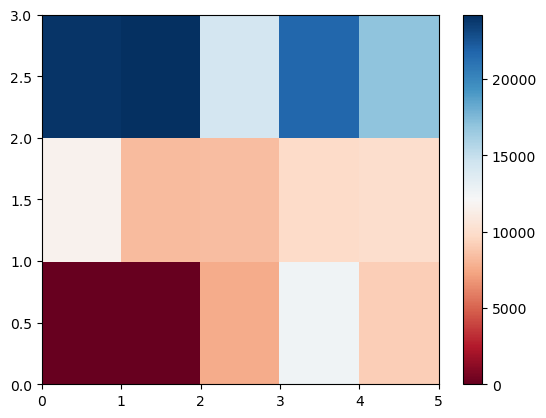

In [165]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

#### Метки по умолчанию не несут нам никакой полезной информации. Давайте изменим это:

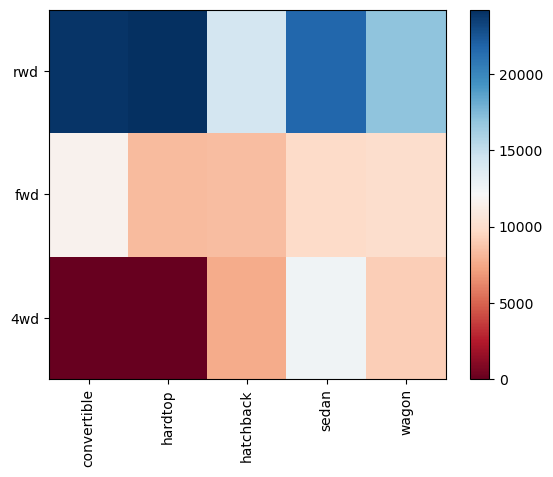

In [168]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Корреляция и причинно-следственная связь

In [171]:
from scipy import stats

#### Колесная база против цены

In [174]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


#### Мощность против цены

In [177]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036562  with a P-value of P =  6.369057428259557e-48


#### Ширина против цены

In [180]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522675  with a P-value of P = 9.200335510480491e-38


#### Снаряженная масса против цены

In [183]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53


#### Объем двигателя и цена

In [186]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


#### Диаметр отверстия против цены

In [189]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.049189483935315e-17


#### Город-миль на галлон против цены

In [192]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


#### Расход топлива на шоссе и цена

In [195]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.749547114447557e-31
